In [15]:
import numpy as np
from scipy.fftpack import fft
import random

In [28]:
# Choose the signal frequency (0.2Hz) and the number of cycles to sample over (2) and the number of samples (50)

f_s = 0.2
N_cycles = 2.0
N_samples = 50

# Calculate the timespan
period = 1/f_s
T =  N_cycles*period

# Set the number of terms in the Fourier series (initially, equal to the number of samples, which is bad!)

N_terms = int(N_samples/2)

random.seed(1)

In [29]:
# Calculate the spacing (in time) between data points
dt = T/N_samples

# Set up arrays to hold the time (x-axis), amplitude (y-axis), and frequencies (Fourier transform)
t = np.zeros(N_samples)
y = np.zeros(N_samples)
f = np.zeros(N_terms)

yhigh = np.zeros(1000)
ylow = np.zeros(1000)
time = np.zeros(1000)

ytReal = np.zeros(N_terms)
ytImag = np.zeros(N_terms)

yfftReal = np.zeros(N_terms)
yfftImag = np.zeros(N_terms)

power = np.zeros(N_terms)
powerfft = np.zeros(N_terms)

## Theory

The function that we will choose is:

$y(t) = sin(2 \pi f_s t)$

The Fourier approximation is given by:

$y(t) \approx \frac{a_0}{2} + \sum_{n=1}^{\infty} \left ( a_n cos(\frac{2 \pi n t}{T}) + b_n sin(\frac{2 \pi n t}{T}) \right )$

where $T$ is the time-span.

For the chosen function, we expect:

$a_0 = 0$

$a_n = 0,~for~all~n$

Since we have a single sine wave with with frequency, $f_s$, we would expect one of the $b_n$ values to be non-zero, and the rest zero.  The value of n for the single non-zero $b_n$ value can be calculated from:

$2 \pi f_s = \frac{2 \pi n}{T}$

$n = T\cdot f_s = (0.2)(10.0) = 2$

Thus, we expect:

$b_2 = 1, and~all~other~b_n=0$

In [30]:
# Create the data set.  Add a little bit of random noise into the signal.

for i in range(N_samples):
    t[i]=i*dt
    y[i]=(1.0+0.00000002*random.uniform(0,1))*np.sin(2.0*np.pi*t[i]*f_s)
    
for i in range(N_terms):
    f[i] = i/(N_terms*dt)
    
    
print (y,f,t)

[ 0.00000000e+00  2.48689891e-01  4.81753681e-01  6.84547109e-01
  8.44327934e-01  9.51056525e-01  9.98026741e-01  9.82287266e-01
  9.04827054e-01  7.70513243e-01  5.87785262e-01  3.68124556e-01
  1.25333235e-01 -1.25333234e-01 -3.68124556e-01 -5.87785261e-01
 -7.70513246e-01 -9.04827070e-01 -9.82287268e-01 -9.98026729e-01
 -9.51056517e-01 -8.44327935e-01 -6.84547119e-01 -4.81753678e-01
 -2.48689888e-01 -2.44929362e-16  2.48689887e-01  4.81753676e-01
  6.84547112e-01  8.44327934e-01  9.51056521e-01  9.98026733e-01
  9.82287255e-01  9.04827061e-01  7.70513247e-01  5.87785253e-01
  3.68124559e-01  1.25333235e-01 -1.25333235e-01 -3.68124554e-01
 -5.87785264e-01 -7.70513256e-01 -9.04827055e-01 -9.82287257e-01
 -9.98026743e-01 -9.51056530e-01 -8.44327941e-01 -6.84547112e-01
 -4.81753682e-01 -2.48689890e-01] [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8] [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4

# Calculating the coefficients

We will determine the coefficients by numerical integration, according to:

$a_0 = \frac{2}{T} \int_0^T f(t) dt$

$a_n = \frac{2}{T} \int_0^T f(t) cos(\frac{2 \pi n}{T} t) dt$

$b_n = \frac{2}{T} \int_0^T f(t) sin(\frac{2 \pi n}{T} t) dt$

In [31]:
from timeit import default_timer as timer

start = timer()

# Define a useful constant, because I am sick of typing it so many times!

twopiT=2.0*np.pi/T

# rather than just making things exactly zero, make them a small number, so that logarithmic plots do not fail.
epsilon = 0.001

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n] = ytReal[n] + 2.0/T*y[i]*np.cos(twopiT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(twopiT*n*i*dt)*dt  
    power[n]=(ytReal[n]**2+ytImag[n]**2)
    
end = timer()
btime = end-start
print ("Brash: ",btime)
ymaxr = max(ytReal)
ymaxi = max(ytImag)
ymax = 1.2*max(ymaxr,ymaxi)

Brash:  0.01115188654512167


In [32]:
integral = 0.0
N_real = int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
print("Average Power = %.2f Watts." % (integral/2.0))

#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/dt)
print("Nyquist frequency = %.2f Hz." % f_nyquist)

for i in range(1000):
    time[i] = i*T/1000.0
    ylow[i] = np.sin(2.0*np.pi*time[i]*f_s)
    yhigh[i] = -np.sin(2.0*np.pi*time[i]*(2.0*f_nyquist-f_s))


Average Power = 0.50 Watts.
Nyquist frequency = 2.50 Hz.


In [33]:
start = timer()
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2
end = timer()
print ("Python: ",(end-start))
print("Ratio = ",btime/(end-start))

for i in range(N_terms):
    print (ytReal[i],yfftReal[i],ytImag[i],yfftImag[i],power[i],powerfft[i])
    

Python:  0.0005247090011835098
Ratio =  21.25346910376605
0.0009999981079202701 -1.892079699583604e-09 0.001 -0.0 1.9999962158441203e-06 3.579965589576382e-18
0.001000000178962599 1.789626809471877e-10 0.0010000009824702592 -9.824702626459514e-10 2.000002322866714e-06 9.972754581554096e-19
0.0010000000507058675 5.0705967851666765e-11 1.0010000094036333 -1.0000000094036332 1.0020020188261753 1.0000000188072666
0.0009999996465257042 -3.5347439204977443e-10 0.001000001228211072 -1.2282112004060193e-09 2.0000017494751857e-06 1.6334468986377526e-18
0.0010000005678408048 5.678409052476803e-10 0.0010000003280041985 -3.280042480066657e-10 2.0000017916904366e-06 4.300300803829232e-19
0.0010000003492445456 3.4924466343891603e-10 0.0010000004325964838 -4.3259656799804384e-10 2.0000015636823682e-06 3.0911162558424786e-19
0.0009999994275484685 -5.72451555126819e-10 0.0010000006123378436 -6.123374816479877e-10 2.000000079773327e-06 7.026579743981132e-19
0.001000001139846089 1.1398456418432071e-09 0.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


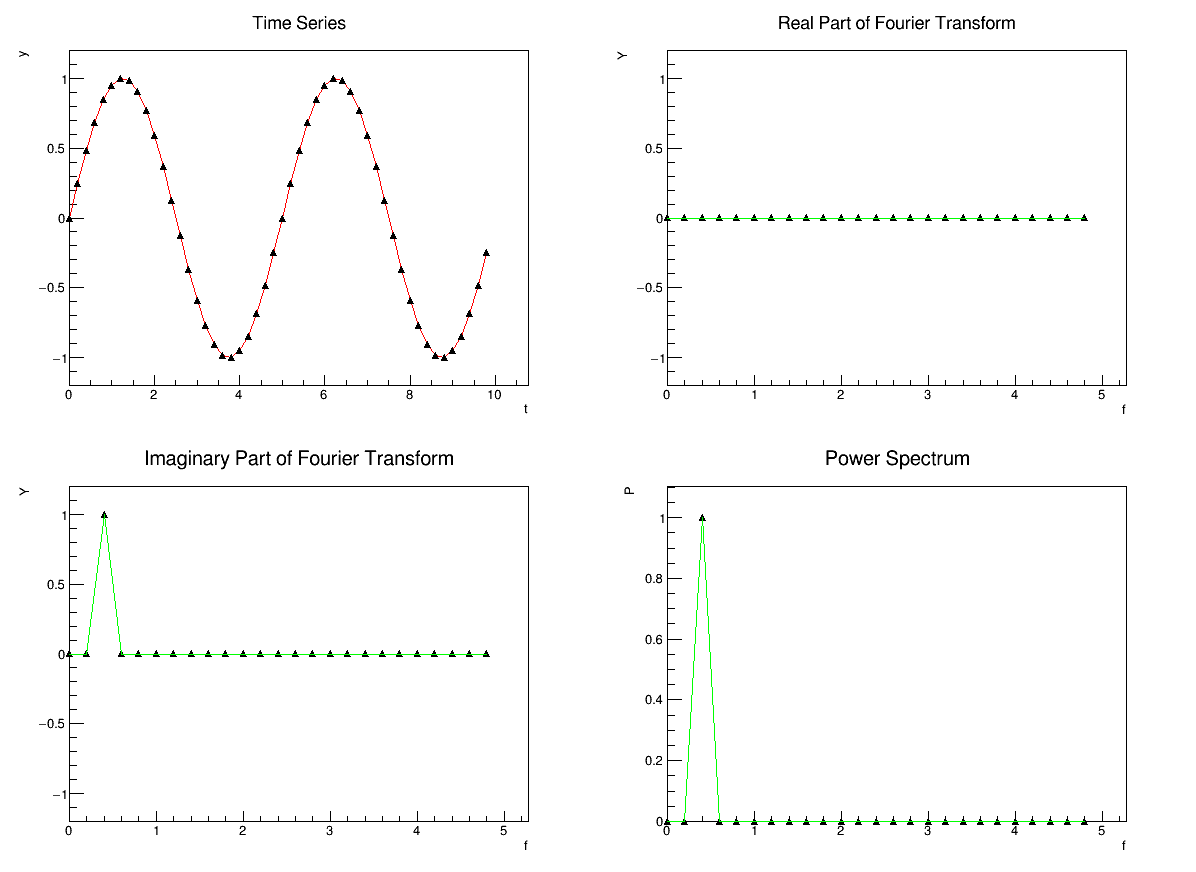

In [34]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1
from ROOT import gStyle, gPad

Ns = N_samples
Nt = N_terms

gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Fourier Transform', 200, 10, 1200, 900 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(2,2)

c1.cd(1)
gr = TGraph(Ns,t,y)
gr.SetMarkerStyle(22)
gr.SetLineColor(2)
gr.SetTitle("Time Series")
gr.GetXaxis().SetTitle("t")
gr.GetYaxis().SetTitle("y")
gr.Draw("APL")

c1.cd(2)
grr = TGraph(Nt,f,ytReal)
grr.SetMarkerStyle(22)
grr.SetLineColor(2)
grr.SetTitle("Real Part of Fourier Transform")
grr.GetXaxis().SetTitle("f")
grr.GetYaxis().SetTitle("Y")
grr.GetHistogram().SetMaximum(ymax)
grr.GetHistogram().SetMinimum(-1.0*ymax)

grrfft = TGraph(Nt,f,yfftReal)
grrfft.SetMarkerStyle(23)
grrfft.SetLineColor(3)
grrfft.SetTitle("Real Part of Fourier Transform")
grrfft.GetXaxis().SetTitle("f")
grrfft.GetYaxis().SetTitle("Y")
grrfft.GetHistogram().SetMaximum(ymax)
grrfft.GetHistogram().SetMaximum(-1.0*ymax)

grr.Draw("AP")
grrfft.Draw("L")

c1.cd(3)
gri = TGraph(Nt,f,ytImag)
grifft = TGraph(Nt,f,-yfftImag)
gri.SetMarkerStyle(22)
grifft.SetMarkerStyle(23)
gri.SetLineColor(2)
grifft.SetLineColor(3)
gri.SetTitle("Imaginary Part of Fourier Transform")
gri.GetXaxis().SetTitle("f")
gri.GetYaxis().SetTitle("Y")
gri.GetHistogram().SetMaximum(ymax)
gri.GetHistogram().SetMinimum(-1.0*ymax)
gri.Draw("AP")
grifft.Draw("L")

c1.cd(4)
#gPad.SetLogy()
grp = TGraph(Nt,f,power)
grpfft = TGraph(Nt,f,powerfft)
grp.SetMarkerStyle(22)
grpfft.SetMarkerStyle(23)
grp.SetLineColor(2)
grpfft.SetLineColor(3)
grp.SetTitle("Power Spectrum")
grp.GetXaxis().SetTitle("f")
grp.GetYaxis().SetTitle("P")
gri.GetHistogram().SetMaximum(ymax)
grp.Draw("APL")
grpfft.Draw("L")

c1.Draw()

In [26]:
c2 = TCanvas( 'c1', 'Fourier Transform', 200, 10, 1200, 900 )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


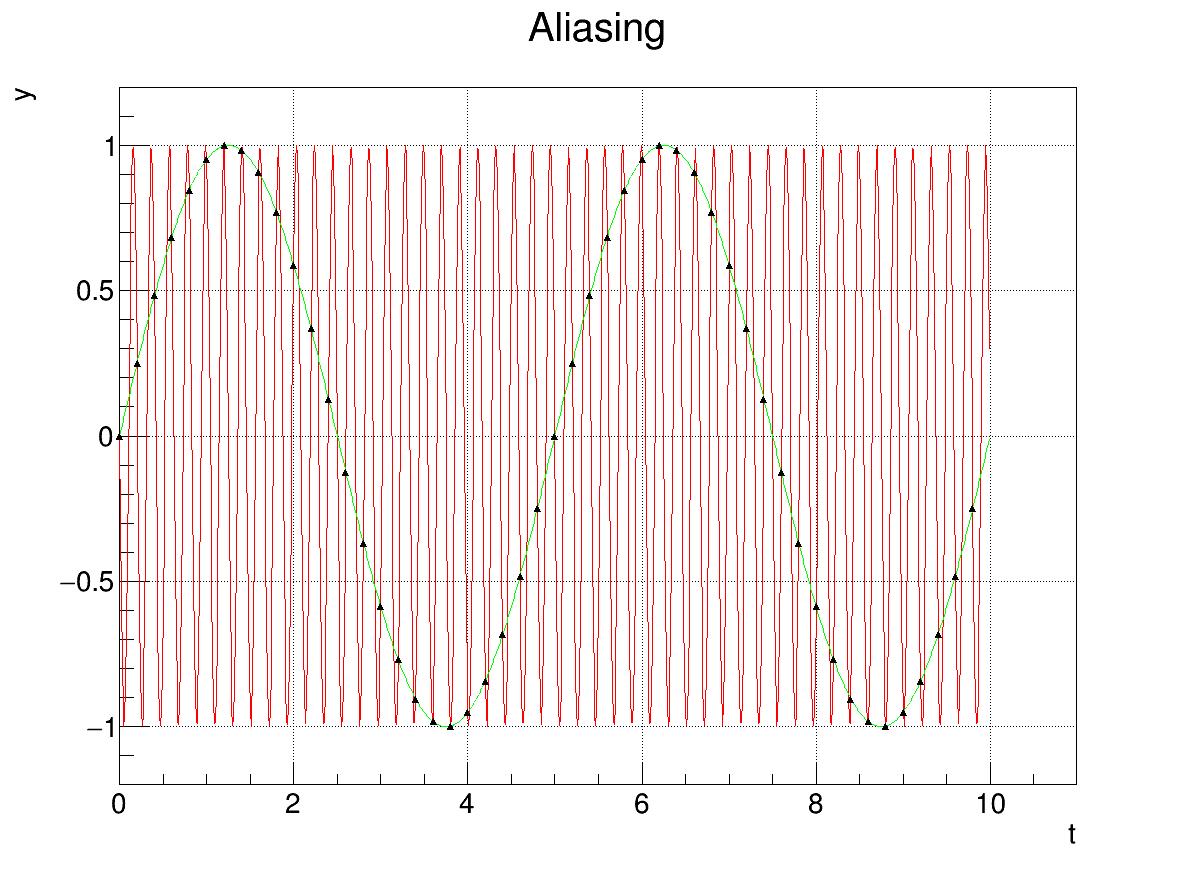

In [27]:
c2.cd()
grhigh = TGraph(1000,time,yhigh)
grlow = TGraph(1000,time,ylow)
grhigh.SetMarkerStyle(22)
grhigh.SetLineColor(2)
grhigh.SetTitle("Aliasing")
grhigh.GetXaxis().SetTitle("t")
grhigh.GetYaxis().SetTitle("y")
grlow.SetMarkerStyle(22)
grlow.SetLineColor(3)
grhigh.Draw("AL")
grlow.Draw("L")
gr.Draw("P")
c2.Draw()